In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#load data and seperate labels
data = pd.read_csv('train.csv')
labels_train = data['Survived']
features_train = data.drop(['Survived'], axis=1)
print(features_train.head())
# axis set to 0 as we are talking about the columns

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex  Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male   22      1      0         A/5 21171   7.2500   NaN        S  
1  female   38      1      0          PC 17599  71.2833   C85        C  
2  female   26      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female   35      1      0            113803  53.1000  C123        S  
4    male   35      0      0            373450   8.0500   NaN        S  


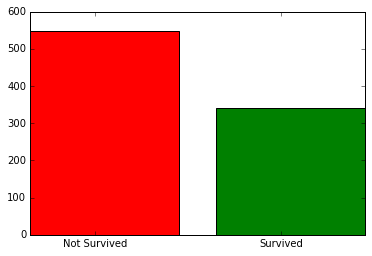

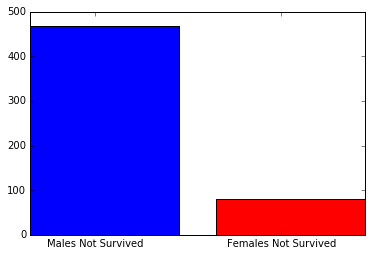

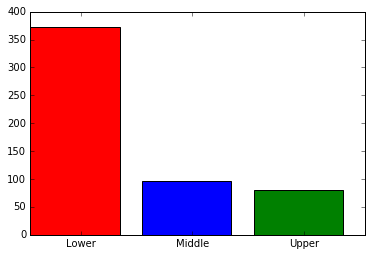

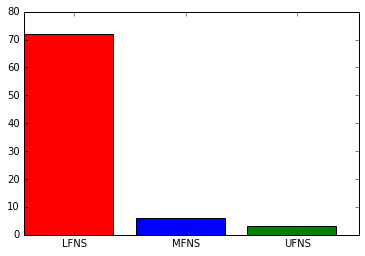

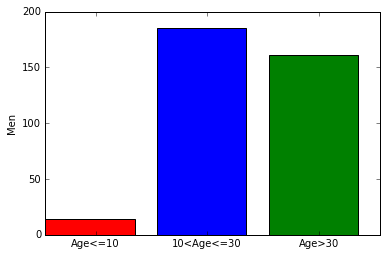

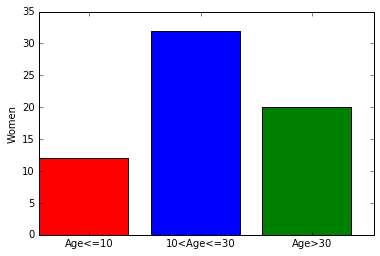

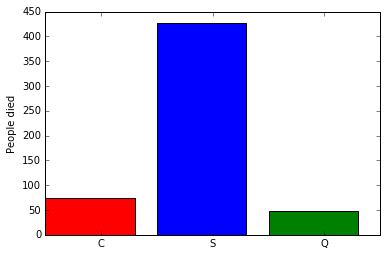

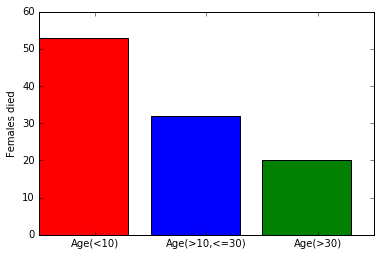

In [3]:
#Belive me its the worst plotting skills
#Data Exploration(I know i could use ratios, but its a genetic problem of using graphs:))
plt.bar([0], [len(labels_train) - sum(labels_train)], color = 'r')
plt.bar([1], [sum(labels_train)], color='g')
plt.xticks([0+0.35,1+0.35], ['Not Survived', 'Survived'])
plt.show()
#No of females and males dying
plt.bar([0], [len(data[(data['Survived']==0)&(data['Sex']=='male')])], color='b')
plt.bar([1], [len(data[(data['Survived']==0)&(data['Sex']=='female')])],color='r')
plt.xticks([0+0.35, 1+0.35],['Males Not Survived','Females Not Survived'])
plt.show()
#Thus a considerable amount of men died and many ladies were saved!!
#Let us see how travelling class decided Death in the Titanic
plt.bar([0],[len(data[(data['Survived']==0)&(data['Pclass']==3)])], color='r')
plt.bar([1],[len(data[(data['Survived']==0)&(data['Pclass']==2)])], color='b')
plt.bar([2],[len(data[(data['Survived']==0)&(data['Pclass']==1)])], color='g')
plt.xticks([0+0.45, 1+0.45, 2+0.45], ['Lower', 'Middle', 'Upper'])
plt.show()
#Let us see how lower class females did
plt.bar([0],[len(data[(data['Survived']==0)&(data['Pclass']==3)&(data['Sex']=='female')])],color='r')
plt.bar([1],[len(data[(data['Survived']==0)&(data['Pclass']==2)&(data['Sex']=='female')])],color='b')
plt.bar([2],[len(data[(data['Survived']==0)&(data['Pclass']==1)&(data['Sex']=='female')])],color='g')
plt.xticks(np.arange(3)+0.45, ['LFNS','MFNS','UFNS'])
plt.show()
#Age can be an important feature too. Thus let us explore that too.
plt.bar([0],[len(data[(data['Survived']==0)&(data['Age']<=10)&(data['Sex']=='male')])],color='r')
plt.bar([1],[len(data[(data['Survived']==0)&((data['Age']>10)&(data['Age']<=30))&(data['Sex']=='male')])],color='b')
plt.bar([2],[len(data[(data['Survived']==0)&(data['Age']>30)&(data['Sex']=='male')])],color='g')
plt.xticks(np.arange(3)+0.45, ['Age<=10','10<Age<=30','Age>30'])
plt.ylabel("Men")
plt.show()
plt.bar([0],[len(data[(data['Survived']==0)&(data['Age']<=10)&(data['Sex']=='female')])],color='r')
plt.bar([1],[len(data[(data['Survived']==0)&((data['Age']>10)&(data['Age']<=30))&(data['Sex']=='female')])],color='b')
plt.bar([2],[len(data[(data['Survived']==0)&(data['Age']>30)&(data['Sex']=='female')])],color='g')
plt.xticks(np.arange(3)+0.45, ['Age<=10','10<Age<=30','Age>30'])
plt.ylabel("Women")
plt.show()
plt.bar([0],[len(data[(data['Survived']==0)&(data['Embarked']=='C')])],color='r')
plt.bar([1],[len(data[(data['Survived']==0)&(data['Embarked']=='S')])],color='b')
plt.bar([2],[len(data[(data['Survived']==0)&(data['Embarked']=='Q')])],color='g')
plt.xticks(np.arange(3)+0.5, ['C','S','Q'])
plt.ylabel("People died")
plt.show()
plt.bar([0],[len(data[(data['Survived']==0)&(data['Age']>=10)&(data['Sex']=='female')])],color='r')
plt.bar([1],[len(data[(data['Survived']==0)&((data['Age']>10)&(data['Age']<=30))&(data['Sex']=='female')])],color='b')
plt.bar([2],[len(data[(data['Survived']==0)&(data['Age']>30)&(data['Sex']=='female')])],color='g')
plt.xticks(np.arange(3)+0.5, ['Age(<10)','Age(>10,<=30)','Age(>30)'])
plt.ylabel("Females died")
plt.show()

Thus it can be seen that features that matter the most are as
1. Sex
2. Pclass
3. Age
4. Embarkment point

Others like Fare, PassengerId, Name definately don't play a role. Fare is a proportional to embarkement point and pclass(It can be used best ways, however). And Cabin may play a role in the escape. Thus to get sufficient accuracy, we begin with the above few features itself.
Taking accuracy_measure() as a measure of accuracy.

In [4]:
def accuracy_measure(labels_test, features_test):
    predicted_survival = classify(features_test)
    true_classified = float(sum((labels_test == predicted_survival)))/len(labels_test)
    return true_classified

In [5]:
def classify(features_set):
    predicted_survival = []
    for _,feature_data in features_set.iterrows():
        if(feature_data['Sex'] == 'male'):
            if((feature_data['Age']<10)and(feature_data['Pclass']!=3)):
                predicted_survival.append(1)
            else:
                predicted_survival.append(0)
        else:
            if(feature_data['Embarked'] == 'S') and (feature_data['Pclass'] == 3):
                predicted_survival.append(0)
            else:
                predicted_survival.append(1)
    return predicted_survival
data_test = pd.read_csv('test.csv')
accuracy_measure(labels_train, features_train)

0.8237934904601572

In [19]:
def makeFinalAnswer(test_set):
    predictions = classify(test_set)
    a = pd.DataFrame({'PassengerId':test_set['PassengerId'], 'Survived':predictions})
    print a 
    a.to_csv('ans2.csv')
makeFinalAnswer(data_test)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3